# Hadamard Gate

For Ch.1 slides regarding superposition

## Create a Quantum Circuit

https://lab.quantum-computing.ibm.com/user/63caf927b266615326c81a07/lab/workspaces/auto-a/tree/qiskit-tutorials/qiskit/circuits/01_circuit_basics.ipynb


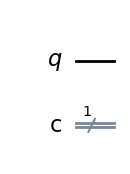

In [1]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit

# Create a quatum circuit to act on an n qubit register
n = 1                        # n = the number of qubits
creg = 1                     # number of classical bits
qc = QuantumCircuit(n,creg)  # Quantum register with n qubits

# Visualize the circuit
qc.draw('mpl')

In [2]:
from qiskit.quantum_info import Statevector

basis = 0                                 # basis state
state = Statevector.from_int(basis,2**n)  # initial state with 2^n dimensions
state.draw('latex')                       # visualize state

<IPython.core.display.Latex object>

## Apply Hadamard Gate
Let's put our quantum circuit in a superposition state by adding a Hadamard gate.

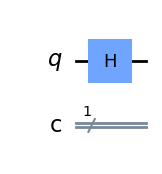

In [3]:
qc.clear()
qc.h(0)   # This is an H gate on qubit 0
qc.draw('mpl')

We can simulate the circuit by setting the initial state and then evolving it.

In [4]:
# We can now evolve our state using our quantum circuit
evolved_state = state.evolve(qc)
evolved_state.draw('latex')


<IPython.core.display.Latex object>

## Measurement

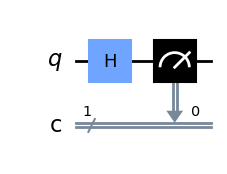

In [5]:
# We can also take a measurement that will tell us which state
# the qubit is in and store it in the classical bit
qc.measure(0,0)
qc.draw('mpl')


In [6]:
# Now we can simulate our circuit by transpiling it and 
# creating a result object
from qiskit.providers.aer import AerSimulator
backend = AerSimulator()
compiled_qc = transpile(qc, backend)

We can change the number of shots for our simulation to examine the how a qubit in superposition behaves upon measurement

{'1': 2022, '0': 2074}


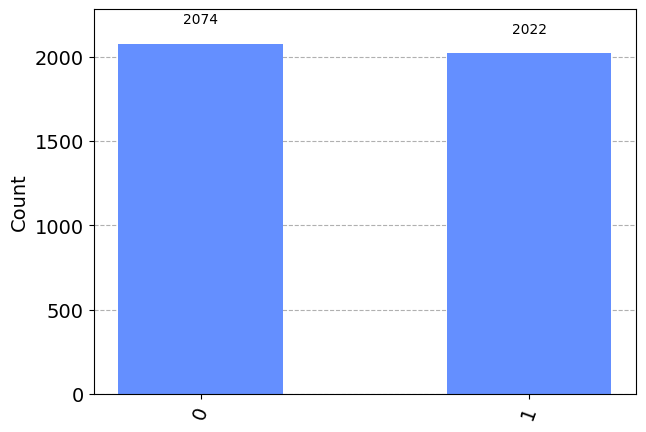

In [7]:
# Increase number of shots
sim = backend.run(compiled_qc, shots=4096)
results = sim.result()

# Lastly we can print the outcomes from our ciruit and make a histogram
counts = results.get_counts(compiled_qc)
print(counts)
plot_histogram(counts)

This demonstrates how the Hadamard gate created a superposition of states for
our qubit and how the measement collapses our state into one or the other. Many repititions of measurement provides a more accurate result of the probability.

In [8]:
#qiskit_copyright

<b>New Section running on actual quantum computer</b>

In [9]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider(instance="ibm-q/open/main")
#provider.backends()
backend = provider.get_backend('ibmq_quito')

In [ ]:
compiled_qc = transpile(qc, backend)
# run the compiled code
sim = backend.run(compiled_qc, shots=1024)
results = sim.result()

# Lastly we can print the outcomes from our ciruit and make a histogram
counts = results.get_counts(compiled_qc)
print(counts)
plot_histogram(counts)